## Problem Statement

The given data speaks about first corporate hospital in India, renowned as the architect of modern healthcare and acclaimed for pioneering the private healthcare revolution in the country. As a data scientist working at this organization, help it to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic by doing following:

- Which variables are significant in predicting the reason for hospitalization for different regions
- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

## Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats

## Load the given data

In [3]:
data = pd.read_csv('scaler_apollo_hospitals.csv')
data

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...,...
1333,1333,50,male,no,northwest,10.32,3,26501
1334,1334,18,female,no,northeast,10.64,0,5515
1335,1335,18,female,no,southeast,12.28,0,4075
1336,1336,21,female,no,southwest,8.60,0,5020


In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


__Given data is at Patient-level collected data__

Here 'hospitalization charges' is dependent variable.
and 'age', 'sex', 'smoker', 'region', 'viral load', 'severity level' are independent variable.

'sex', 'smoker', 'region' and 'severity level' can be converted to categorical datatype

##  Exploratory Data Analysis

### Non Graphical Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

__NO missing values in given data__

In [7]:
## check for duplicates
data.duplicated().unique()

array([False,  True])

__There are some duplicate values in given data__

In [8]:
data[data.duplicated()]

,age,sex,smoker,region,viral load,severity level,hospitalization charges
581,19,male,no,northwest,10.2,0,4099


__Dropping duplicate entries from given data__

In [9]:
data.drop_duplicates(keep='first', inplace=True, ignore_index=True)
data

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1332,50,male,no,northwest,10.32,3,26501
1333,18,female,no,northeast,10.64,0,5515
1334,18,female,no,southeast,12.28,0,4075
1335,21,female,no,southwest,8.60,0,5020


__Check for categorical variables__

In [10]:
for i in data.columns:
    if data[i].nunique() < 10:
        print(i, ':', np.sort(data[i].unique()))

sex : ['female' 'male']
smoker : ['no' 'yes']
region : ['northeast' 'northwest' 'southeast' 'southwest']
severity level : [0 1 2 3 4 5]


__Converting above mentioned columns to categorical data type__

In [11]:
for i in data.columns:
    if data[i].nunique() < 10:
        data[i] = data[i].astype('category')
        
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1337 non-null   int64   
 1   sex                      1337 non-null   category
 2   smoker                   1337 non-null   category
 3   region                   1337 non-null   category
 4   viral load               1337 non-null   float64 
 5   severity level           1337 non-null   category
 6   hospitalization charges  1337 non-null   int64   
dtypes: category(4), float64(1), int64(2)
memory usage: 37.3 KB


__Statistical Summary__

In [12]:
data.describe(include='all')

,age,sex,smoker,region,viral load,severity level,hospitalization charges
count,1337.000000,1337,1337,1337,1337.000000,1337.0,1337.000000
unique,NaN,2,2,4,NaN,6.0,NaN
top,NaN,male,no,southeast,NaN,0.0,NaN
freq,NaN,675,1063,364,NaN,573.0,NaN
mean,39.222139,NaN,NaN,NaN,10.221249,NaN,33197.806283
std,14.044333,NaN,NaN,NaN,2.033556,NaN,30275.900411
min,18.000000,NaN,NaN,NaN,5.320000,NaN,2805.000000
25%,27.000000,NaN,NaN,NaN,8.760000,NaN,11866.000000
50%,39.000000,NaN,NaN,NaN,10.130000,NaN,23465.000000
75%,51.000000,NaN,NaN,NaN,11.570000,NaN,41644.000000


__Value counts for categorical data__

In [13]:
for i in data.columns:
    if data[i].nunique() < 10:
        print(i)
        print(data[i].value_counts())
        print()

sex
male      675
female    662
Name: sex, dtype: int64

smoker
no     1063
yes     274
Name: smoker, dtype: int64

region
southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

severity level
0    573
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64



__Patients analysis w.r.t. categorical variables in probabilities(%)__

In [14]:
pd.crosstab(index=data['sex'], columns=data['region'], margins=True, margins_name='Total', normalize='all').round(3)*100

region,northeast,northwest,southeast,southwest,Total
sex,,,,,
female,12.0,12.3,13.1,12.1,49.5
male,12.2,12.0,14.1,12.2,50.5
Total,24.2,24.2,27.2,24.3,100.0


In [15]:
pd.crosstab(index=data['sex'], columns=data['smoker'], margins=True, margins_name='Total', normalize='all').round(3)*100

smoker,no,yes,Total
sex,,,
female,40.9,8.6,49.5
male,38.6,11.9,50.5
Total,79.5,20.5,100.0


In [16]:
pd.crosstab(index=data['sex'], columns=data['severity level'], margins=True, margins_name='Total', normalize='all').round(3)*100

severity level,0,1,2,3,4,5,Total
sex,,,,,,,
female,21.6,11.8,8.9,5.8,0.8,0.6,49.5
male,21.2,12.4,9.1,6.0,1.0,0.7,50.5
Total,42.9,24.2,18.0,11.7,1.9,1.3,100.0


In [17]:
pd.crosstab(index=data['smoker'], columns=data['region'], margins=True, margins_name='Total', normalize='all').round(3)*100

region,northeast,northwest,southeast,southwest,Total
smoker,,,,,
no,19.2,19.9,20.4,20.0,79.5
yes,5.0,4.3,6.8,4.3,20.5
Total,24.2,24.2,27.2,24.3,100.0


In [18]:
pd.crosstab(index=data['smoker'], columns=data['severity level'], margins=True, margins_name='Total', normalize='all').round(4)*100

severity level,0,1,2,3,4,5,Total
smoker,,,,,,,
no,34.26,19.67,13.84,8.83,1.65,1.27,79.51
yes,8.60,4.56,4.11,2.92,0.22,0.07,20.49
Total,42.86,24.23,17.95,11.74,1.87,1.35,100.00


In [19]:
pd.crosstab(index=data['region'], columns=data['severity level'], margins=True, margins_name='Total', normalize='all').round(3)*100

severity level,0,1,2,3,4,5,Total
region,,,,,,,
northeast,11.0,5.8,3.8,2.9,0.5,0.2,24.2
northwest,9.8,5.5,4.9,3.4,0.4,0.1,24.2
southeast,11.7,7.1,4.9,2.6,0.4,0.4,27.2
southwest,10.3,5.8,4.3,2.8,0.5,0.6,24.3
Total,42.9,24.2,18.0,11.7,1.9,1.3,100.0


### Graphical Analysis

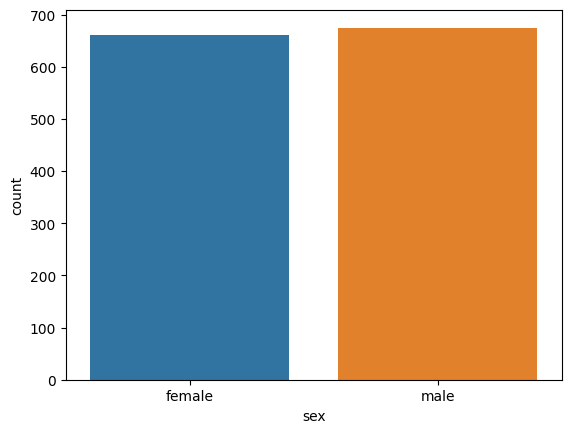

In [20]:
sns.countplot(data, x='sex')
plt.show()

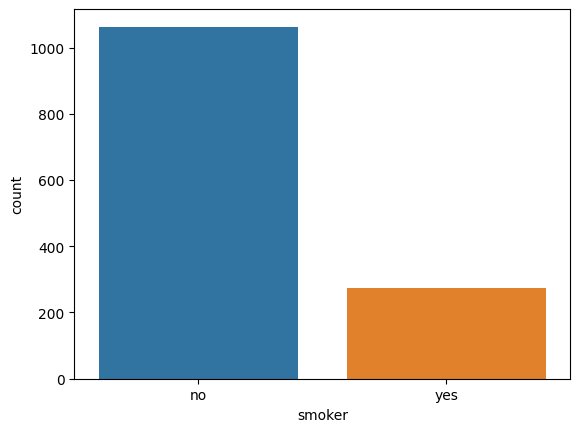

In [21]:
sns.countplot(data, x='smoker')
plt.show()

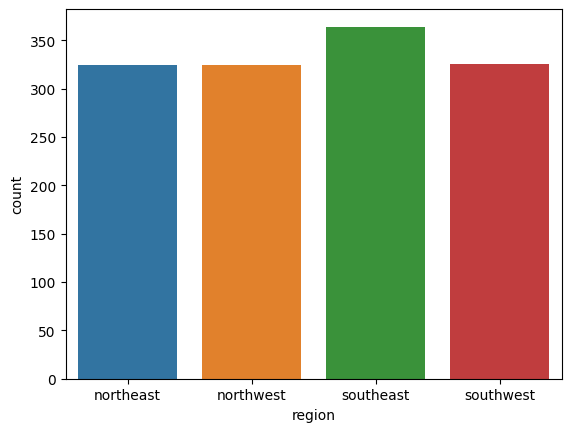

In [22]:
sns.countplot(data, x='region')
plt.show()

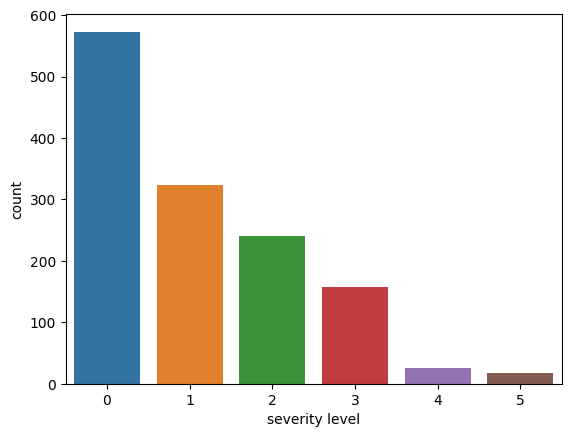

In [23]:
sns.countplot(data, x='severity level')
plt.show()

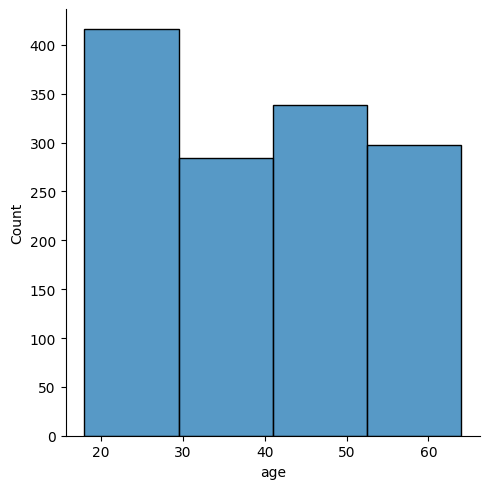

In [24]:
sns.displot(data, x='age', bins=4)
plt.show()

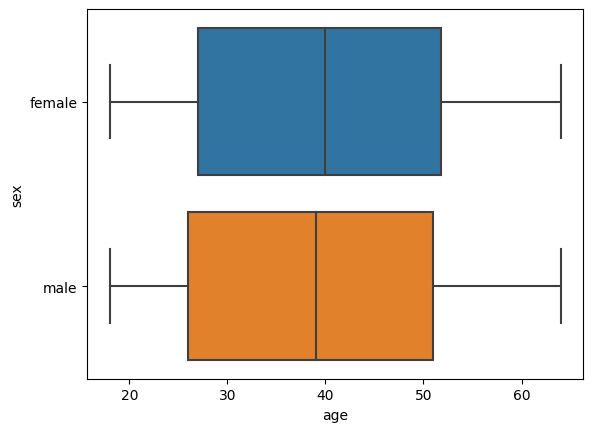

In [25]:
sns.boxplot(data, x='age', y='sex')
plt.show()

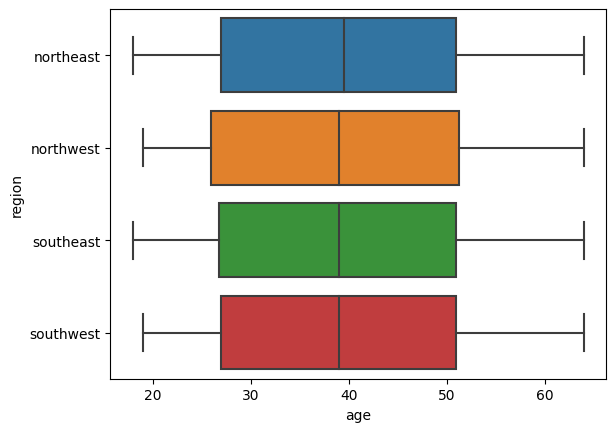

In [26]:
sns.boxplot(data, x='age', y='region')
plt.show()

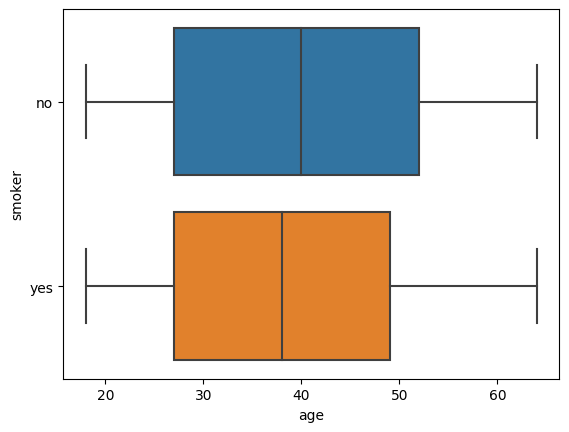

In [27]:
sns.boxplot(data, x='age', y='smoker')
plt.show()

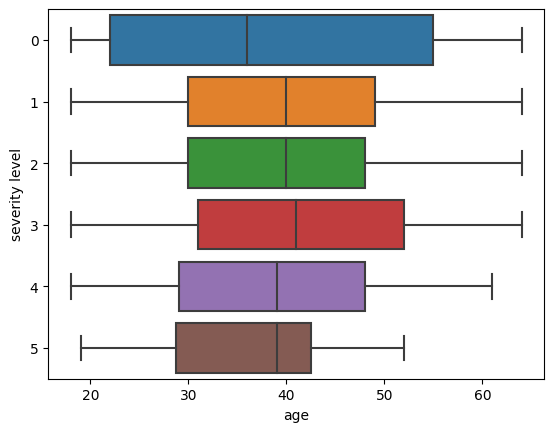

In [28]:
sns.boxplot(data, x='age', y='severity level')
plt.show()

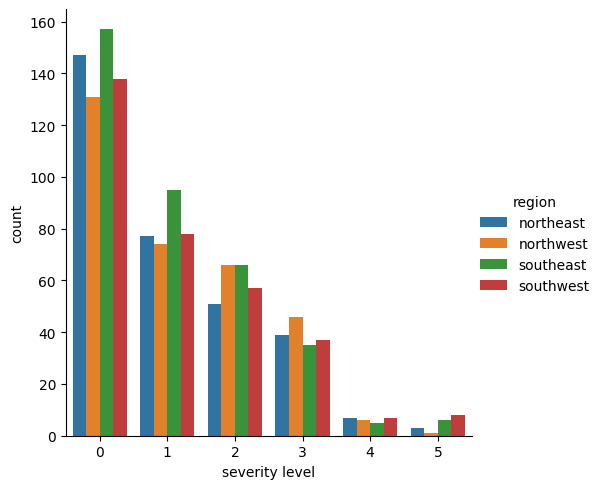

In [87]:
sns.catplot(data, x='severity level', kind='count', hue='region')
plt.show()

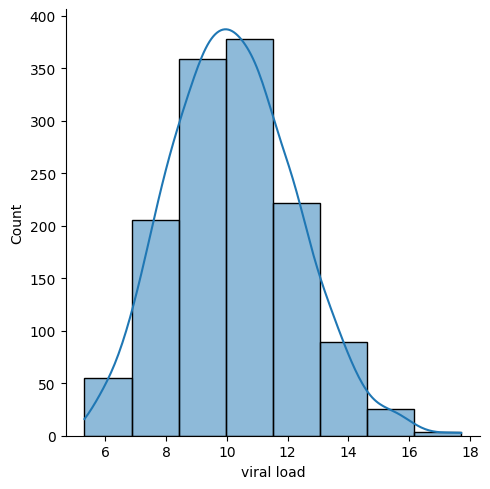

In [29]:
sns.displot(data, x='viral load', bins=8, kde=True)
plt.show()

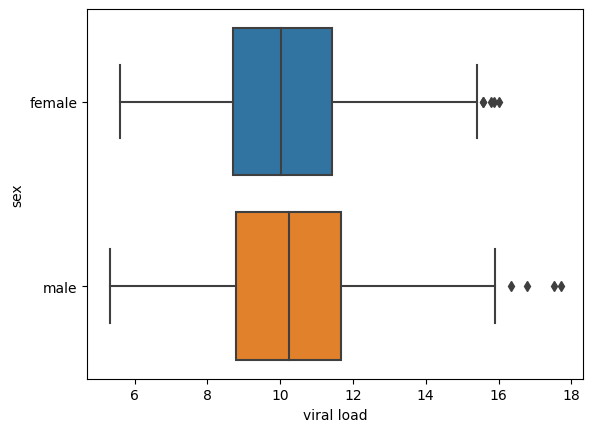

In [30]:
sns.boxplot(data, x='viral load', y='sex')
plt.show()

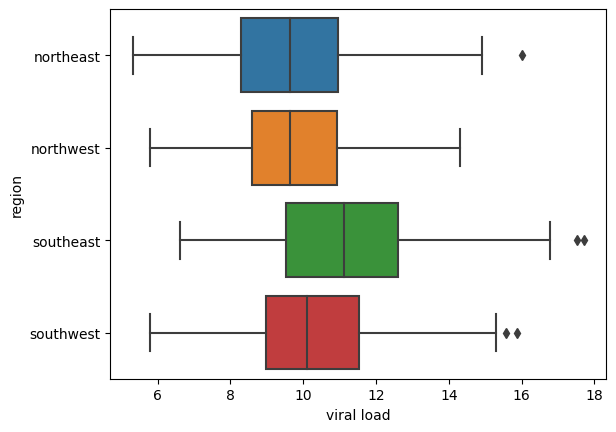

In [31]:
sns.boxplot(data, x='viral load', y='region')
plt.show()

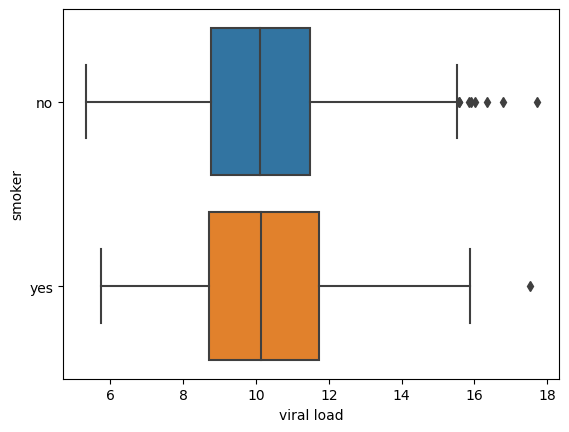

In [32]:
sns.boxplot(data, x='viral load', y='smoker')
plt.show()

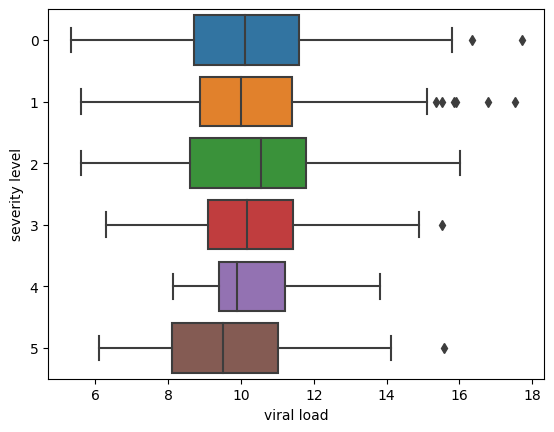

In [33]:
sns.boxplot(data, x='viral load', y='severity level')
plt.show()

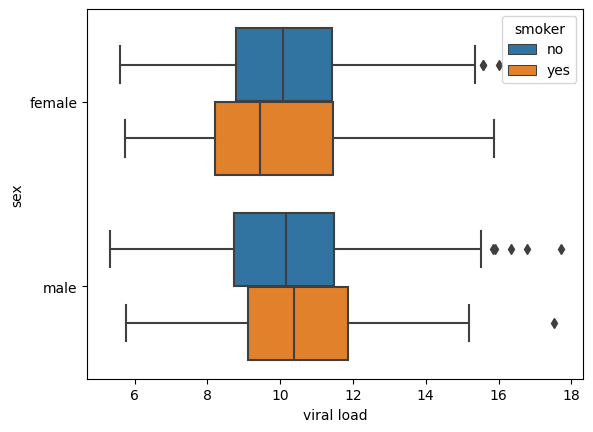

In [34]:
sns.boxplot(data, x='viral load', y='sex', hue='smoker')
plt.show()

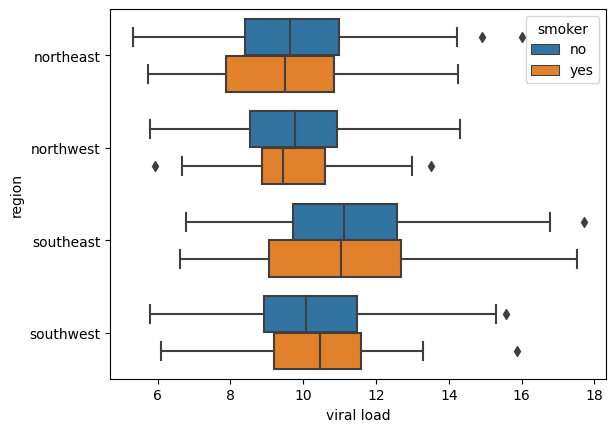

In [35]:
sns.boxplot(data, x='viral load', y='region', hue='smoker')
plt.show()

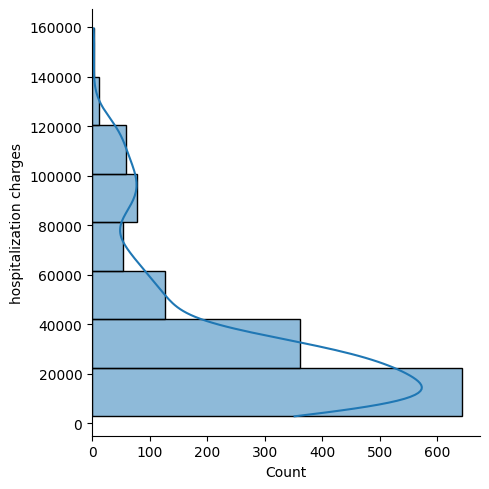

In [36]:
sns.displot(data, y='hospitalization charges', bins=8, kde=True)
plt.show()

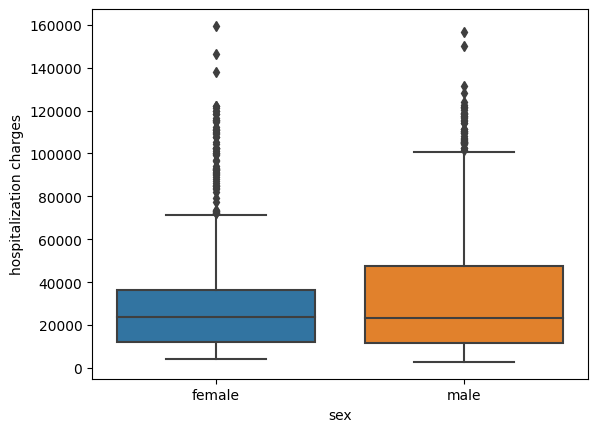

In [37]:
sns.boxplot(data, x='sex', y='hospitalization charges')
plt.show()

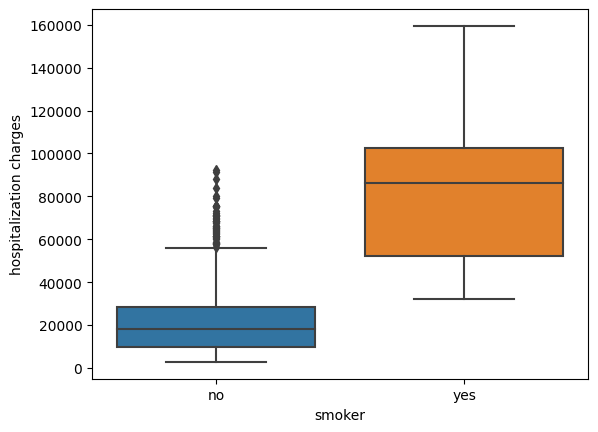

In [38]:
sns.boxplot(data, x='smoker', y='hospitalization charges')
plt.show()

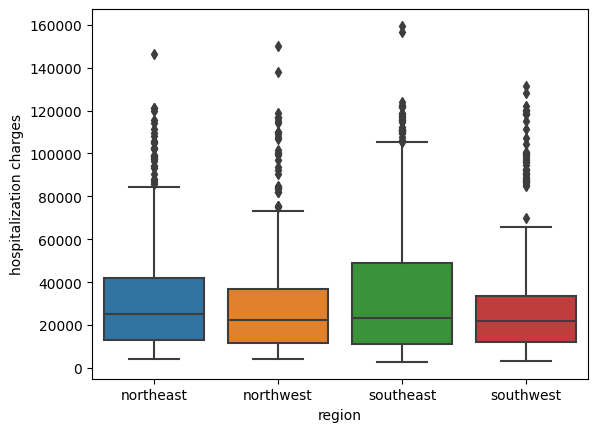

In [39]:
sns.boxplot(data, x='region', y='hospitalization charges')
plt.show()

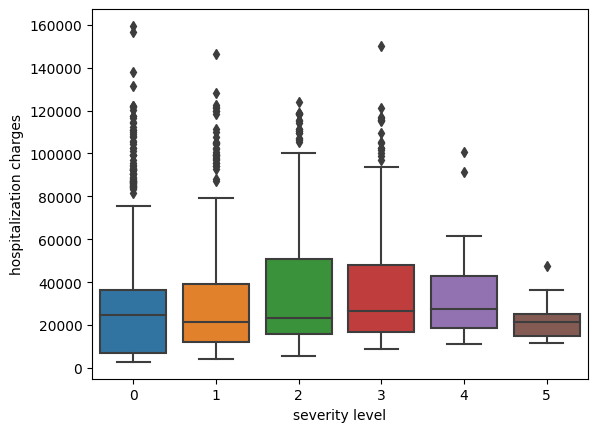

In [40]:
sns.boxplot(data, x='severity level', y='hospitalization charges')
plt.show()

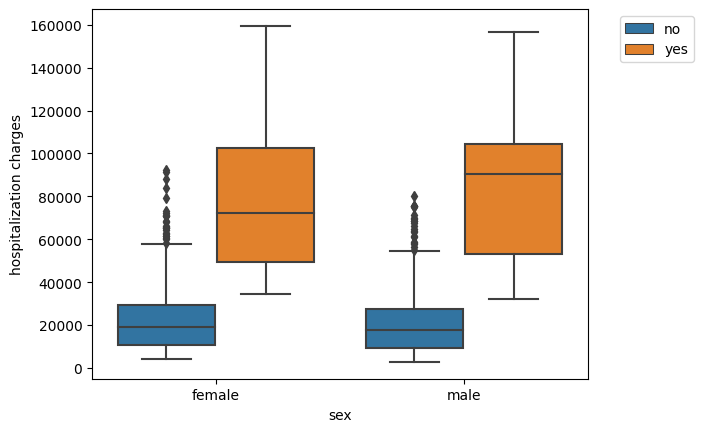

In [41]:
sns.boxplot(data, x='sex', y='hospitalization charges', hue='smoker')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

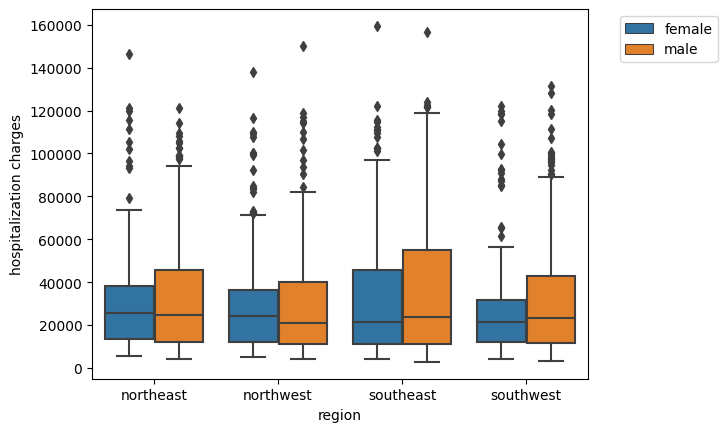

In [42]:
sns.boxplot(data, x='region', y='hospitalization charges', hue='sex')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

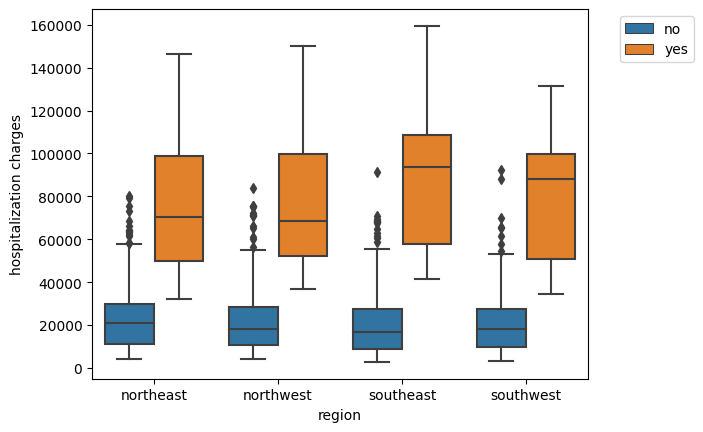

In [43]:
sns.boxplot(data, x='region', y='hospitalization charges', hue='smoker')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

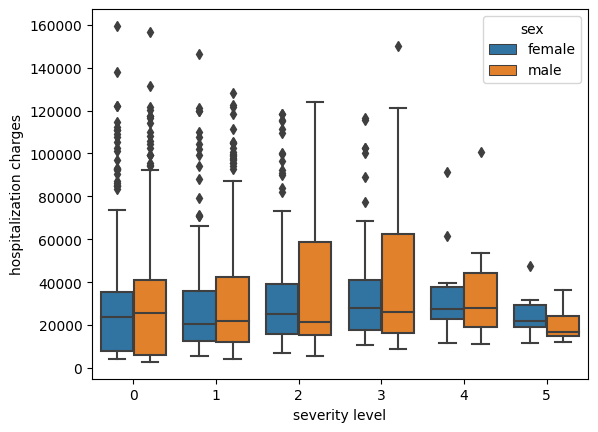

In [44]:
sns.boxplot(data, x='severity level', y='hospitalization charges', hue='sex')
plt.show()

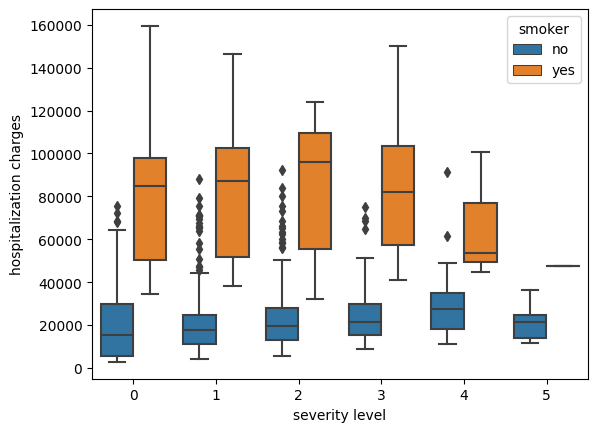

In [45]:
sns.boxplot(data, x='severity level', y='hospitalization charges', hue='smoker')
plt.show()

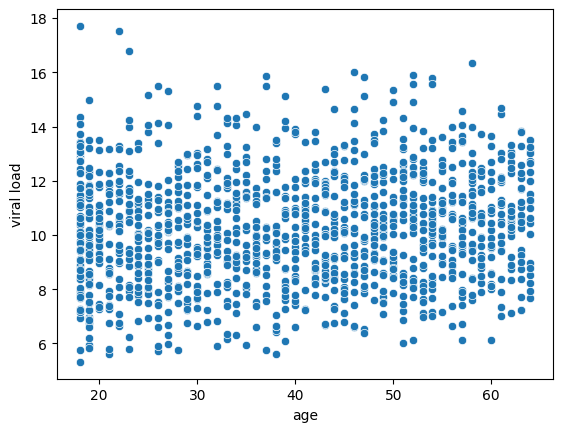

In [46]:
sns.scatterplot(data, x='age', y='viral load')
plt.show()

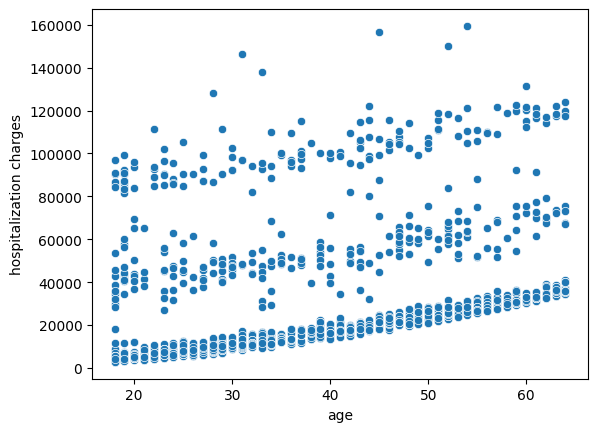

In [47]:
sns.scatterplot(data, x='age', y='hospitalization charges')
plt.show()

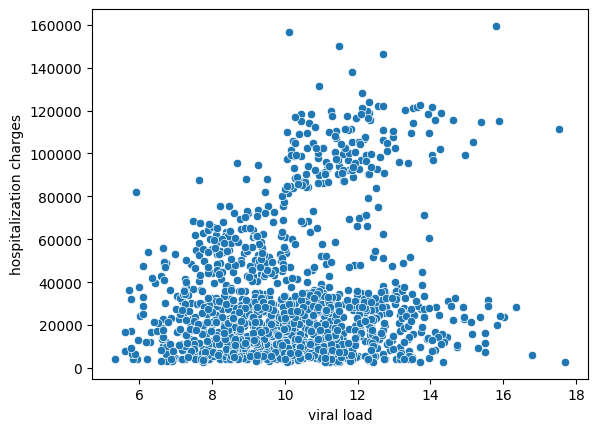

In [48]:
sns.scatterplot(data, x='viral load', y='hospitalization charges')
plt.show()

#### There are some outliers in "viral load" and "hospitalization charges" but given dataset contain very few observations to draw conclusion so it is best not treat outliers as they may carry some useful information

## Hypothesis Testing

### Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't smoke

In [49]:
# Null Hypothesis H0 = hospitalization charges of people who do smoking are less than or equal to those who don't smoke
# Alternate Hypothesis Ha = hospitalization charges of people who do smoking are greater than those who don't smoke

In [50]:
# check assumptions of the test
# check for normality by  histogram or equality of variance by leven test

In [51]:
gp1 = data.loc[data['smoker'] == 'no', 'hospitalization charges'].to_numpy()
gp2 = data.loc[data['smoker'] == 'yes', 'hospitalization charges'].to_numpy()

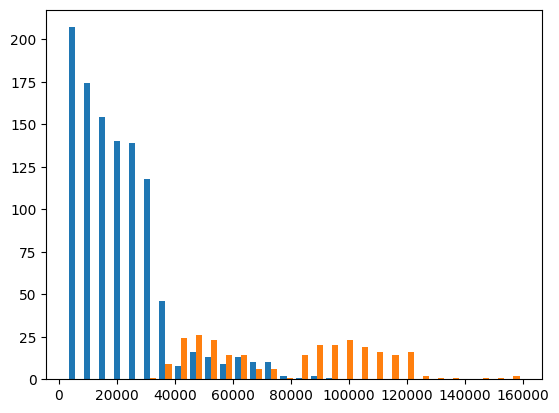

In [52]:
plt.hist([gp1, gp2], bins=30)
plt.show()

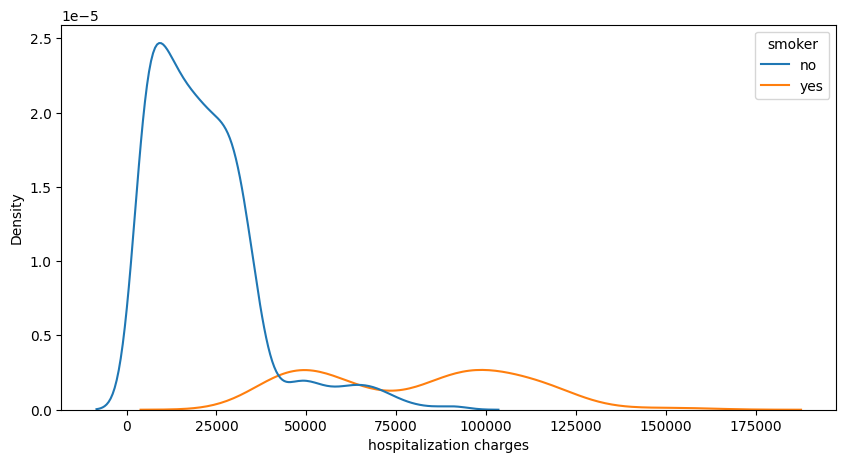

In [53]:
plt.figure(figsize=(10,5))
sns.kdeplot(data, x='hospitalization charges', hue='smoker')
plt.show()

In [54]:
L_stat, p_val = stats.levene(gp1, gp2)
alpha = 0.05

if p_val < alpha:
    print(f'As the p_value is {p_val} less than significance level {alpha}')
    print('Input samples are from populations with unequal variances')
else:
    print(f'As the p_value is {p_val.round(3)} greater than significance level {alpha}')
    print('Input samples are from populations with equal variances')

As the p_value is 1.6725298746067794e-66 less than significance level 0.05
Input samples are from populations with unequal variances


In [55]:
var_gp1 = np.var(gp1)
var_gp2 = np.var(gp2)

In [56]:
var_gp2, var_gp1

(829508540.9016064, 224262205.2342268)

In [57]:
print('Ratio of variances for 2 samples is ', int(var_gp2 / var_gp1), ':', int(var_gp1 / var_gp1))

Ratio of variances for 2 samples is  3 : 1


In [58]:
t_stat, p_val = stats.ttest_ind(a=gp2, b=gp1, equal_var=False, alternative='greater')

if p_val < alpha:
    print(f'As the p_value is {p_val} less than significance level {alpha}')
    print('Strong evidence against Null Hypothesis')
    print("Hospitalization charges of people who do smoking are greater than those who don't smoke")
else:
    print(f'As the p_value is {p_val.round(3)} greater than significance level {alpha}')
    print('No strong evidence against Null Hypothesis')
    print("hospitalization charges of people who do smoking are less than or equal to those who don't smoke")

As the p_value is 3.1316463129101665e-103 less than significance level 0.05
Strong evidence against Null Hypothesis
Hospitalization charges of people who do smoking are greater than those who don't smoke


### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

In [59]:
# Null Hypothesis H0 = mean of viral load for females is equal to mean of viral load for males
# Alternate Hypothesis Ha = mean of viral load for females is not equal to mean of viral load for males

In [60]:
# check assumptions of the test
# check for normality by  histogram or equality of variance by leven test

In [61]:
gp_F = data.loc[data['sex'] == 'female', 'viral load'].to_numpy()
gp_M = data.loc[data['sex'] == 'male', 'viral load'].to_numpy()

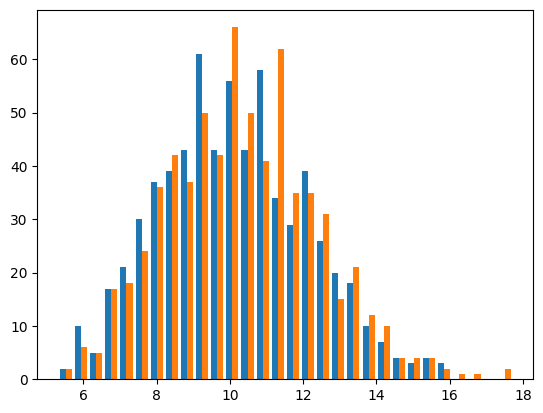

In [62]:
plt.hist([gp_F, gp_M], bins=30)
plt.show()

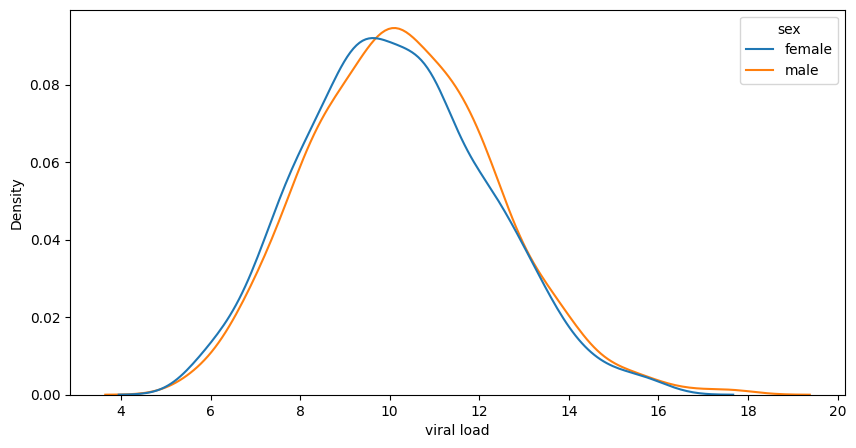

In [63]:
plt.figure(figsize=(10,5))
sns.kdeplot(data, x='viral load', hue='sex')
plt.show()

In [64]:
L_stat, p_val = stats.levene(gp_F, gp_M)
alpha = 0.05

if p_val < alpha:
    print(f'As the p_value is {p_val.round(3)} less than significance level {alpha}')
    print('Input samples are from populations with unequal variances')
else:
    print(f'As the p_value is {p_val.round(3)} greater than significance level {alpha}')
    print('Input samples are from populations with equal variances')

As the p_value is 0.922 greater than significance level 0.05
Input samples are from populations with equal variances


In [65]:
var_gp_F = np.var(gp_F)
var_gp_M = np.var(gp_M)

In [66]:
var_gp_M, var_gp_F

(4.189735945130316, 4.055708441872564)

In [67]:
print('Ratio of variances for 2 samples is ', int(var_gp_M / var_gp_F), ':', int(var_gp_F / var_gp_F))

Ratio of variances for 2 samples is  1 : 1


In [68]:
t_stat, p_val = stats.ttest_ind(a=gp_F, b=gp_M, equal_var=True, alternative='two-sided')

if p_val < alpha:
    print(f'As the p_value is {p_val.round(3)} less than significance level {alpha}')
    print('Strong evidence against Null Hypothesis')
    print("Mean of viral load for females is not equal to mean of viral load for males")
else:
    print(f'As the p_value is {p_val.round(3)} greater than significance level {alpha}')
    print('No strong evidence against Null Hypothesis')
    print("Mean of viral load for females is equal to mean of viral load for males")

As the p_value is 0.09 greater than significance level 0.05
No strong evidence against Null Hypothesis
Mean of viral load for females is equal to mean of viral load for males


### Is the proportion of smoking significantly different across different regions?

In [69]:
# Null Hypothesis H0 = proportion of smoking is not significantly different across different regions
# Alternate Hypothesis Ha = proportion of smoking is significantly different across different regions

In [70]:
table_obs = pd.crosstab(index=data['smoker'], columns=data['region'], margins=True, margins_name='Total')
table_obs

region,northeast,northwest,southeast,southwest,Total
smoker,,,,,
no,257,266,273,267,1063
yes,67,58,91,58,274
Total,324,324,364,325,1337


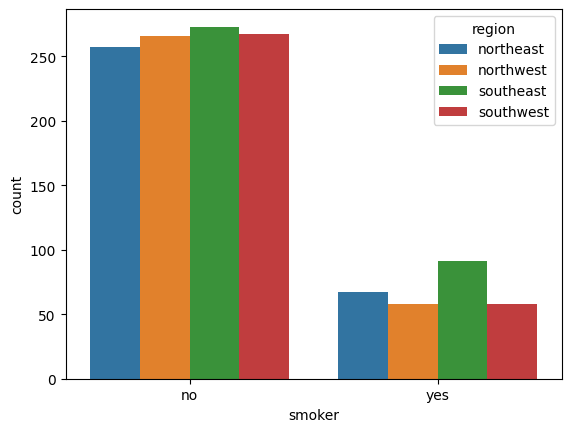

In [71]:
sns.countplot(data, x='smoker', hue='region')
plt.show()

In [72]:
observed = table_obs.iloc[0:2,0:4]
observed

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,266,273,267
yes,67,58,91,58


In [73]:
chi2, p, dof, ex = stats.chi2_contingency(observed=observed, correction=False)

if p_val < alpha:
    print(f'As the p_value is {p_val.round(3)} less than significance level {alpha}')
    print('Strong evidence against Null Hypothesis')
    print("Proportion of smoking is significantly different across different regions")
else:
    print(f'As the p_value is {p_val.round(3)} greater than significance level {alpha}')
    print('No strong evidence against Null Hypothesis')
    print("Proportion of smoking is not significantly different across different regions")

As the p_value is 0.09 greater than significance level 0.05
No strong evidence against Null Hypothesis
Proportion of smoking is not significantly different across different regions


### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?

In [74]:
# Null Hypothesis H0 = given samples of severity level with (0,1,2) have same population mean 
# Alternate Hypothesis Ha = given samples of severity level with (0,1,2) have different population mean

In [75]:
obs = data.loc[data['sex'] == 'female', ['severity level', 'viral load']]
gp_0 = obs.loc[obs['severity level']==0, 'viral load'].to_numpy()
gp_1 = obs.loc[obs['severity level']==1, 'viral load'].to_numpy()
gp_2 = obs.loc[obs['severity level']==2, 'viral load'].to_numpy()

In [76]:
# check assumptions of the test
# check for normality by  histogram or equality of variance by leven test

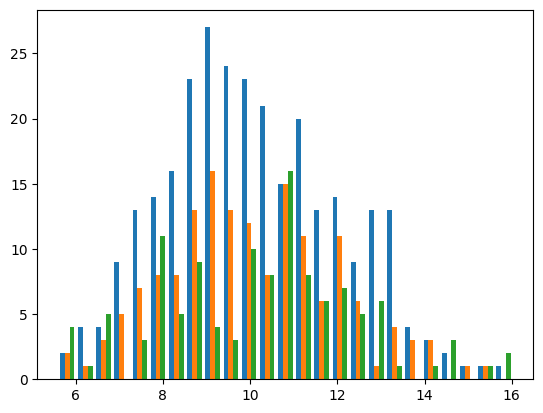

In [77]:
plt.hist([gp_0, gp_1, gp_2], bins=25)
plt.show()

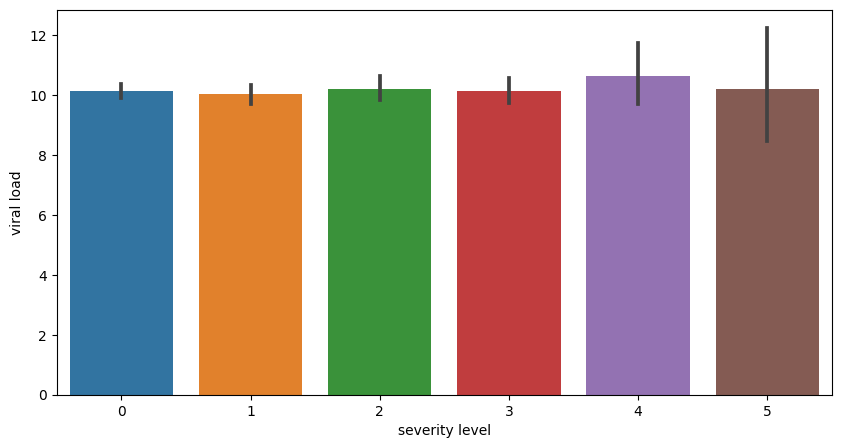

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(obs, x='severity level', y='viral load')
plt.show()

In [79]:
L_stat, p_val = stats.levene(gp_0, gp_1, gp_2)
alpha = 0.05

if p_val < alpha:
    print(f'As the p_value is {p_val.round(3)} less than significance level {alpha}')
    print('Input samples are from populations with unequal variances')
else:
    print(f'As the p_value is {p_val.round(3)} greater than significance level {alpha}')
    print('Input samples are from populations with equal variances')

As the p_value is 0.39 greater than significance level 0.05
Input samples are from populations with equal variances


In [80]:
stats, p_val = stats.f_oneway(gp_0, gp_1, gp_2)

if p_val < alpha:
    print(f'As the p_value is {p_val.round(3)} less than significance level {alpha}')
    print('Strong evidence against Null Hypothesis')
    print("Given samples of severity level with (0,1,2) have different population mean")
else:
    print(f'As the p_value is {p_val.round(3)} greater than significance level {alpha}')
    print('No strong evidence against Null Hypothesis')
    print("Given samples of severity level with (0,1,2) have same population mean")

As the p_value is 0.715 greater than significance level 0.05
No strong evidence against Null Hypothesis
Given samples of severity level with (0,1,2) have same population mean


## Business Insights:

1. There are 4 regions from which data is collected, in that "southeast" has reported maximum patients
2. severity level 0,1,2,3 patients are more in number than severity level 4,5
3. Proportion of non smoker patients is much large compared to smokers hospitalized patients
4. Order of count of patients according to "severity level" in terms of "region", "sex", "smoker" is same as follows
   0 > 1 > 2 > 3 > 4 > 5
5. Patient count with age between 18-30 is higher than any other age group
6. Almost 50% of total patients are from age group 30-50
7. Near about 50% of total patients fall between viral load of 9-12
8. Majority of the patients who do not smoke get "hospitalization charges" below 30k while majority of patients who smoke get   
   "hospitalization charges" between 100K-60k
9. There is no direct significant relation between "hospitalization charges" and {"severity level", "viral load", "sex"}

## Recommendations:

1. If a patient is smoker and between age group of 30-50 then he/she should be considered critical as immunity of these 
   patients are likely to be lower than others. Line of treatment should be different (ICU or seperate ward). 
2. There is no significant relation exist between "hospitalization charges" and {"sex", "region", "viral load"} so these are 
   less significant features.
3. Male patients get high "hospitalization charges" compared to female patients. This can be a significant factor while 
   deciding what treatment is neeeded for males as opposed to females for better recovery.
4. Irrespective of severity level, non smoker patients get less hospitalization charges compared to smokers patients that means
   there is definitely different line of treatment needed among these groups.